<a href="https://colab.research.google.com/github/VenkataJanga/Machine-Learning/blob/master/Ridge_and_Lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import cross_val_score,GridSearchCV


In [0]:
# load the boston data from sklearn library
from sklearn.datasets import load_boston
df = load_boston()

In [0]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [0]:
data = df.data

In [0]:
data.shape

(506, 13)

In [0]:
y = df.target

In [0]:
boston_data = pd.DataFrame(data=data, columns=df.feature_names)

In [0]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [0]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [0]:
X = boston_data


## Linear Regression

In [0]:
lr_model = LinearRegression()
mse = cross_val_score(lr_model,X,y,scoring="neg_mean_squared_error",cv = 5)
mean_mse = np.mean(mse)
print(mean_mse)

-37.131807467699055


## Ridge Regression

In [0]:
#instantiate the ridge object
ridge = Ridge()
parameter = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20,30,35,40,45,50,55,100]}
ridge_reg_model = GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)
ridge_reg_model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   15, 20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [0]:
print(ridge_reg_model.best_params_)
print(ridge_reg_model.best_score_)
print(ridge_reg_model.best_estimator_)
print(ridge_reg_model.best_index_)

{'alpha': 100}
-29.87194511543254
Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
16


## Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameter = {"alpha":[1e-10,1e-8,1e-6,1e-4,1e-2,1,2,4,5,10,15,20,25,30,35,40,45,50,55,100]}
lass_reg_model = GridSearchCV(lasso, parameter,scoring="neg_mean_squared_error",cv=5)
lass_reg_model.fit(X,y)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-08, 1e-06, 0.0001, 0.01, 1, 2, 4,
                                   5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [32]:
print(lass_reg_model.best_params_)
print(lass_reg_model.best_score_)

{'alpha': 1}
-35.4912832636271


# train test split

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

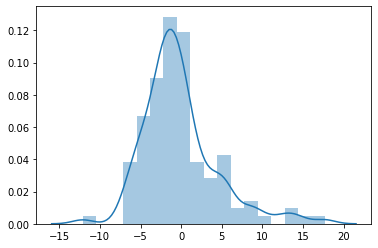

In [34]:
prediction_ridge = ridge_reg_model.predict(X_test) 
prediction_lasso = lass_reg_model.predict(X_test)
sns.distplot(y_test -prediction_ridge )


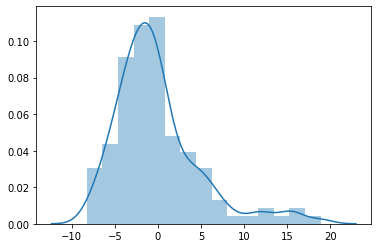

In [35]:
sns.distplot(y_test - prediction_lasso)